In [ ]:
from sklearn import datasets
digits = datasets.load_digits()

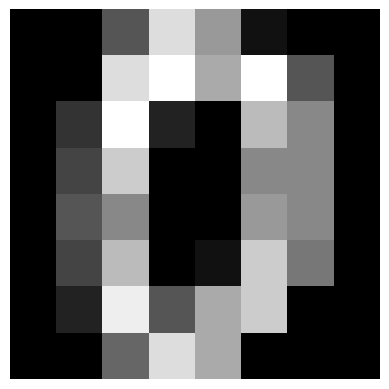

In [ ]:
# plot the first image
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.imshow(digits['images'][0].reshape(8,8), cmap='gray')
plt.axis('off')
plt.show()


In [32]:
# save the first 100 images
for i in range(100):
    plt.imshow(digits['images'][i].reshape(8,8), cmap='gray')
    plt.axis('off')
    plt.savefig('static/images/digit_%03d.png' % i)
    plt.close()

In [36]:
# generate a dataframe with the first 100 images
# simulate clusters for x y z for each type of digit
import pandas as pd
import random
random.seed(42)
data = []
cluster_centers = [
    [0, 0, 0],
    [2, 0, 0],
    [-2, 0, 0],
    [0, 2, 0],
    [0, -2, 0],
    [0, 0, 2],
    [0, 0, -2],
    [0, 2, 2],
    [2, 2, 0],
    [-2, 2, 2]
]
for i in range(100):
    x = random.random() + cluster_centers[digits['target'][i]][0]
    y = random.random() + cluster_centers[digits['target'][i]][1]
    z = random.random() + cluster_centers[digits['target'][i]][2]
    data.append([i, x, y, z, digits['target'][i]])

df = pd.DataFrame(data, columns=['id', 'x', 'y', 'z', 'digit'])
df

,id,x,y,z,digit
0,0,0.639427,0.025011,0.275029,0
1,1,2.223211,0.736471,0.676699,1
2,2,-1.107820,0.086939,0.421922,2
3,3,0.029797,2.218638,0.505355,3
4,4,0.026536,-1.801162,0.649884,4
...,...,...,...,...,...
95,95,0.905336,0.846104,-1.907702,6
96,96,2.423576,2.276680,0.003546,8
97,97,0.771119,-1.362887,0.261955,4
98,98,0.741231,2.551680,0.427687,3


In [ ]:
# get 3 closest points to each point
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=4, algorithm='ball_tree').fit(df[['x', 'y', 'z']])
distances, indices = nbrs.kneighbors(df[['x', 'y', 'z']])
indices = indices[:,1:]
indices

array([[49, 48, 72],
       [70, 80, 42],
       [51, 50, 57],
       [83, 59, 23],
       [68, 14, 41],
       [35, 46, 33],
       [16, 26, 82],
       [43, 94, 52],
       [18, 96, 38],
       [73, 92, 37],
       [20, 72, 36],
       [90, 85, 47],
       [75, 57, 50],
       [63, 89, 98],
       [68, 41,  4],
       [35,  5, 46],
       [34, 58, 65],
       [27, 94, 61],
       [38,  8, 96],
       [31, 29, 39],
       [10, 49, 72],
       [80,  1, 70],
       [51, 77,  2],
       [83, 45,  3],
       [68, 87, 97],
       [74, 71,  5],
       [82, 16, 34],
       [17, 86, 61],
       [53, 40, 18],
       [31, 19, 37],
       [79, 55, 36],
       [19, 29, 37],
       [33,  5, 46],
       [46, 35,  5],
       [16, 65, 58],
       [46,  5, 33],
       [30, 79, 10],
       [92, 39, 29],
       [18,  8, 40],
       [37, 19, 29],
       [28, 38, 18],
       [68, 14, 87],
       [ 1, 70, 80],
       [ 7, 94, 52],
       [ 7, 43, 52],
       [83, 23, 59],
       [35,  5, 33],
       [90, 5

In [39]:
# add nearest neighbors to the dataframe
df['neighbors'] = indices.tolist()
df

,id,x,y,z,digit,neighbors
0,0,0.639427,0.025011,0.275029,0,"[49, 48, 72]"
1,1,2.223211,0.736471,0.676699,1,"[70, 80, 42]"
2,2,-1.107820,0.086939,0.421922,2,"[51, 50, 57]"
3,3,0.029797,2.218638,0.505355,3,"[83, 59, 23]"
4,4,0.026536,-1.801162,0.649884,4,"[68, 14, 41]"
...,...,...,...,...,...,...
95,95,0.905336,0.846104,-1.907702,6,"[67, 65, 34]"
96,96,2.423576,2.276680,0.003546,8,"[18, 8, 53]"
97,97,0.771119,-1.362887,0.261955,4,"[87, 24, 68]"
98,98,0.741231,2.551680,0.427687,3,"[59, 63, 62]"


In [42]:
# add corresponding image file name
df['image'] = df['id'].apply(lambda x: 'digit_%03d.png' % x)
df

,id,x,y,z,digit,neighbors,image
0,0,0.639427,0.025011,0.275029,0,"[49, 48, 72]",digit_000.png
1,1,2.223211,0.736471,0.676699,1,"[70, 80, 42]",digit_001.png
2,2,-1.107820,0.086939,0.421922,2,"[51, 50, 57]",digit_002.png
3,3,0.029797,2.218638,0.505355,3,"[83, 59, 23]",digit_003.png
4,4,0.026536,-1.801162,0.649884,4,"[68, 14, 41]",digit_004.png
...,...,...,...,...,...,...,...
95,95,0.905336,0.846104,-1.907702,6,"[67, 65, 34]",digit_095.png
96,96,2.423576,2.276680,0.003546,8,"[18, 8, 53]",digit_096.png
97,97,0.771119,-1.362887,0.261955,4,"[87, 24, 68]",digit_097.png
98,98,0.741231,2.551680,0.427687,3,"[59, 63, 62]",digit_098.png


In [43]:
# save to csv
df.to_csv('toydataset.csv', index=False)